In [1]:
import dxcam_cpp as dxcam
from src.utils.windowtools import fuzzy_window_search, calculate_aspect_ratio, check_aspect_ratio_validity
import matplotlib.pyplot as plt
from tesserocr import PyTessBaseAPI, PSM
import PIL

import numpy as np
import cv2
import tkinter as tk
import threading
import time as systime

In [2]:
# Global vars
camera = dxcam.create(device_idx=0)
capturing = True
time = 0

In [3]:
coords = fuzzy_window_search("asphalt")

aspect_ratio = calculate_aspect_ratio(coords)

check_aspect_ratio_validity(aspect_ratio)
print(coords)

[(8, 352, 1228, 1025)]
1
The aspect ratio is reasonable.
(8, 352, 1228, 1025)


In [4]:
# Grab a frame from the camera
window = camera.grab()

# Extract coordinates from the coords variable
x1, y1, x2, y2 = coords

capture_coords = (x1, y1, x2, int(y1 + (y2 - y1) / 3.4))

camera.start(region=capture_coords, target_fps=90)

In [5]:
def start_capturing():
    global capturing
    capturing = True
    print("Capturing started")

def stop_capturing():
    global capturing
    capturing = False
    print("Capturing stopped")

def update_time_label():
    global time
    while True:
        time_label.config(text=time)
        time_label.update()
        systime.sleep(0.1)

def create_ui():
    root = tk.Tk()
    root.title("Capture Control")

    start_button = tk.Button(root, text="Start", command=start_capturing, bg="green", fg="white", font=("Helvetica", 16))
    start_button.pack(pady=10)

    stop_button = tk.Button(root, text="Stop", command=stop_capturing, bg="red", fg="white", font=("Helvetica", 16))
    stop_button.pack(pady=10)

    global time_label
    time_label = tk.Label(root, text=f"Time: {time}", font=("Helvetica", 14))
    time_label.pack(pady=10)

    threading.Thread(target=update_time_label, daemon=True).start()

    root.mainloop()

ui_thread = threading.Thread(target=create_ui)
ui_thread.start()

Extracted text: &3 Asphalt - v245.1a - D3D12

H POS. %
DIST. 23%

TOUCHIIE


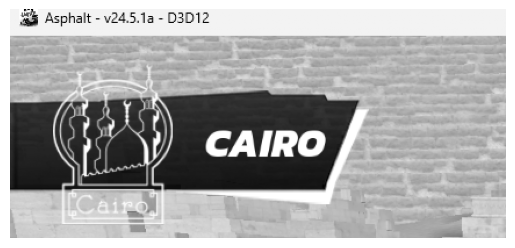

In [ ]:
from IPython.display import clear_output

path = """C:/Users/niran/Documents/ALU-Timing-Tool-Rework/testdata"""
with PyTessBaseAPI(path=path) as api:
    #api.SetVariable("tessedit_char_whitelist", "DIST. 0123456789%")
    while True:
            if capturing:
                window = camera.get_latest_frame()
                # First crop to top-left region
                height, width, _ = window.shape
                top_right_region = window[0:height, 0:int(width*0.35)]
                
                
                    
                # Convert to grayscale and extract text
                gray_region = cv2.cvtColor(top_right_region, cv2.COLOR_RGB2GRAY)

                plt.imshow(gray_region, cmap='gray', vmin=0, vmax=255)
                plt.axis('off')  # Hide the axis
                plt.show()
                systime.sleep(1)

                pil_image = PIL.Image.fromarray(gray_region)
                api.SetImage(pil_image)
                api.Recognize()
                text = api.GetUTF8Text().strip()
                clear_output(wait=True)
                print("Extracted text:", text)
                # # Extract numbers while preserving time format
                # numbers = ''.join(filter(str.isdigit, text))
                # numbers = numbers[-7:] if len(numbers) >= 7 else numbers
                # print("Extracted time:", numbers)
                # #print(f"Number of contours found: {len(contours)}")

            systime.sleep(0.2)